# Behavioural Cloning using Deep CNNs

In [1]:
import numpy as np
import pandas as pd
import scipy.misc as sp
from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
st_time = datetime.now()

## Read The Data

List of image files and associated steering angles is in `driving-log.csv`

The steering angles are between -1..1 which translates into -25 degrees to 25 degrees in the simulator.
Throttle is between -1 and 1.
Speed is between 0 and 30 Mph.


In [3]:
df = pd.read_csv('driving_log.csv', 
                 header=None, 
                 names=['cimage','limage','rimage','steering','throttle','brake','speed'])

In [4]:
df

,cimage,limage,rimage,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236
5,IMG/center_2016_12_01_13_31_13_279.jpg,IMG/left_2016_12_01_13_31_13_279.jpg,IMG/right_2016_12_01_13_31_13_279.jpg,0.0,0.0,0.0,1.403993
6,IMG/center_2016_12_01_13_31_13_381.jpg,IMG/left_2016_12_01_13_31_13_381.jpg,IMG/right_2016_12_01_13_31_13_381.jpg,0.0,0.0,0.0,1.389892
7,IMG/center_2016_12_01_13_31_13_482.jpg,IMG/left_2016_12_01_13_31_13_482.jpg,IMG/right_2016_12_01_13_31_13_482.jpg,0.0,0.0,0.0,1.375934
8,IMG/center_2016_12_01_13_31_13_584.jpg,IMG/left_2016_12_01_13_31_13_584.jpg,IMG/right_2016_12_01_13_31_13_584.jpg,0.0,0.0,0.0,1.362115
9,IMG/center_2016_12_01_13_31_13_686.jpg,IMG/left_2016_12_01_13_31_13_686.jpg,IMG/right_2016_12_01_13_31_13_686.jpg,0.0,0.0,0.0,1.348435


In [5]:
cimage_names = list(df['cimage'])
steering = np.array(df['steering'])

## Visualise Steering Angle Data

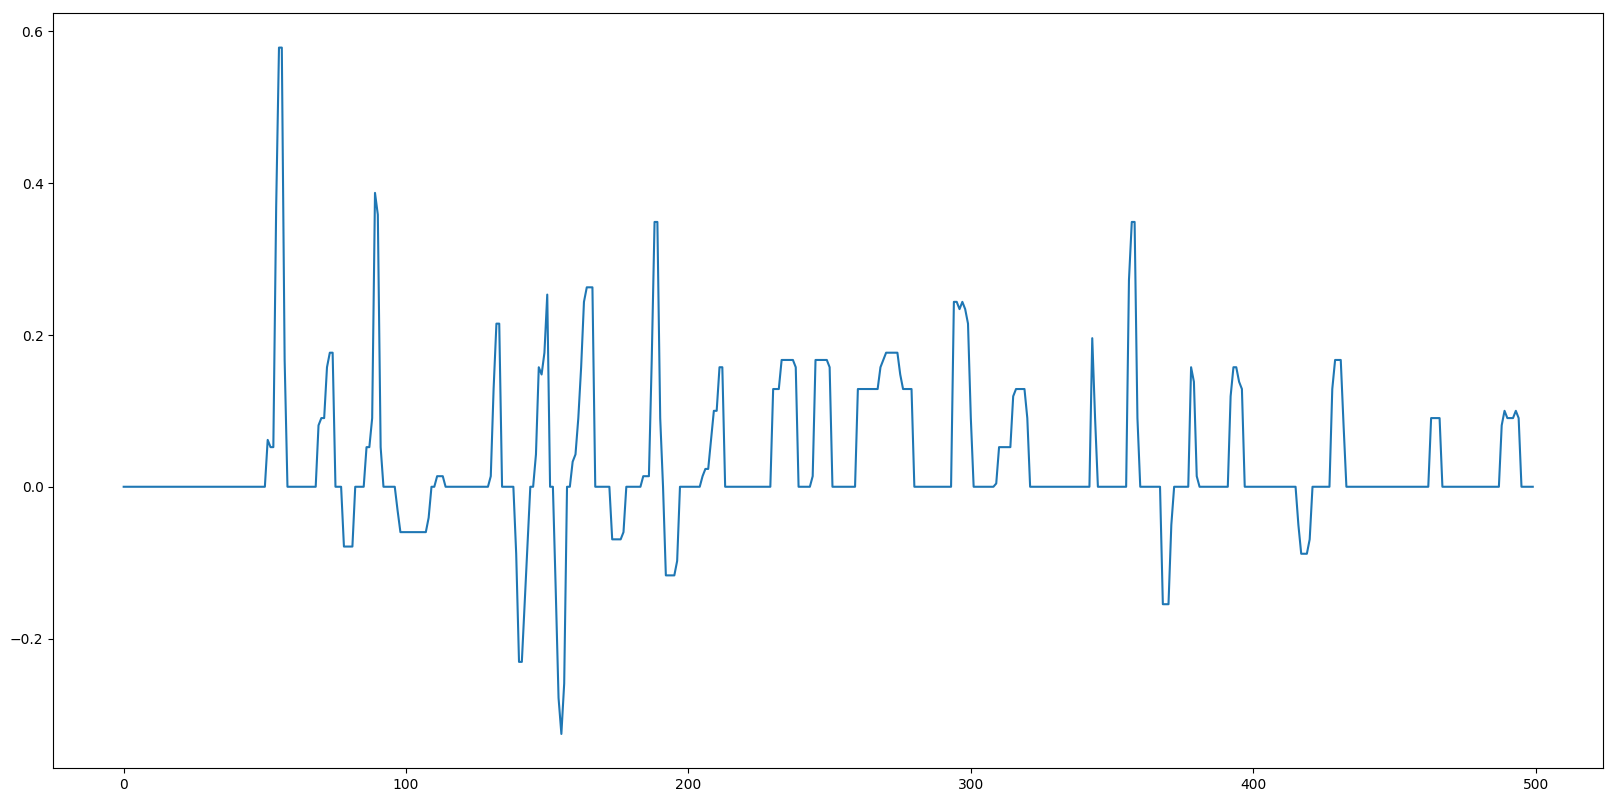

In [6]:
plt.plot(steering[0:500]);

## Read Image Data

In [7]:
def read_image(fname):
    return sp.imread(fname, mode='RGB')

In [8]:
def resize_image(img, size):
    return sp.imresize(img, size=size, interp='cubic')

In [9]:
# image size we will handle in our learning architecture
# all images should be resizied to this size
desired_size = (80,160)

In [10]:
# read the images. 
# if you run out of memory on this step either find a machine with more memory
# or remove limitation on python process memory (for example if you run in docker). 
# or you have to use generators to read images from disk
# during training... for which you need to modify code below.
cimages = np.stack( [resize_image(read_image(file), size=desired_size) for file in cimage_names], axis=0 )

In [11]:
# check the shape of image data
cimages.shape

(8036, 80, 160, 3)

## Visualise Image Data

In [12]:
def show_images(images, labels_true, rows, cols, cls=None, random=True, labels_predicted=None):
    fig, axes = plt.subplots(rows, cols)
    fig.subplots_adjust(hspace=0.37, wspace=0.3)
    imidx = 0
    for i, ax in enumerate(axes.flat):
        while True:
            if random:
                example = np.random.randint(0, len(images))
            else:
                example = imidx
                imidx += 1
            if cls is None or labels_true[example]==cls:
                break
        if example >= len(images):
            return
        if len(images.shape)==4:
            ax.imshow(images[example,:,:,:]);
        else:
            ax.imshow(images[example,:,:], cmap='Greys_r');
        ax.set_xticks([])
        ax.set_yticks([])
        if labels_predicted is not None:
            str = '{}: true {} pred {}'.format(example, labels_true[example], labels_predicted[example])
        else:
            str = '{}: true {}'.format(example, labels_true[example])
        ax.set_xlabel(str)

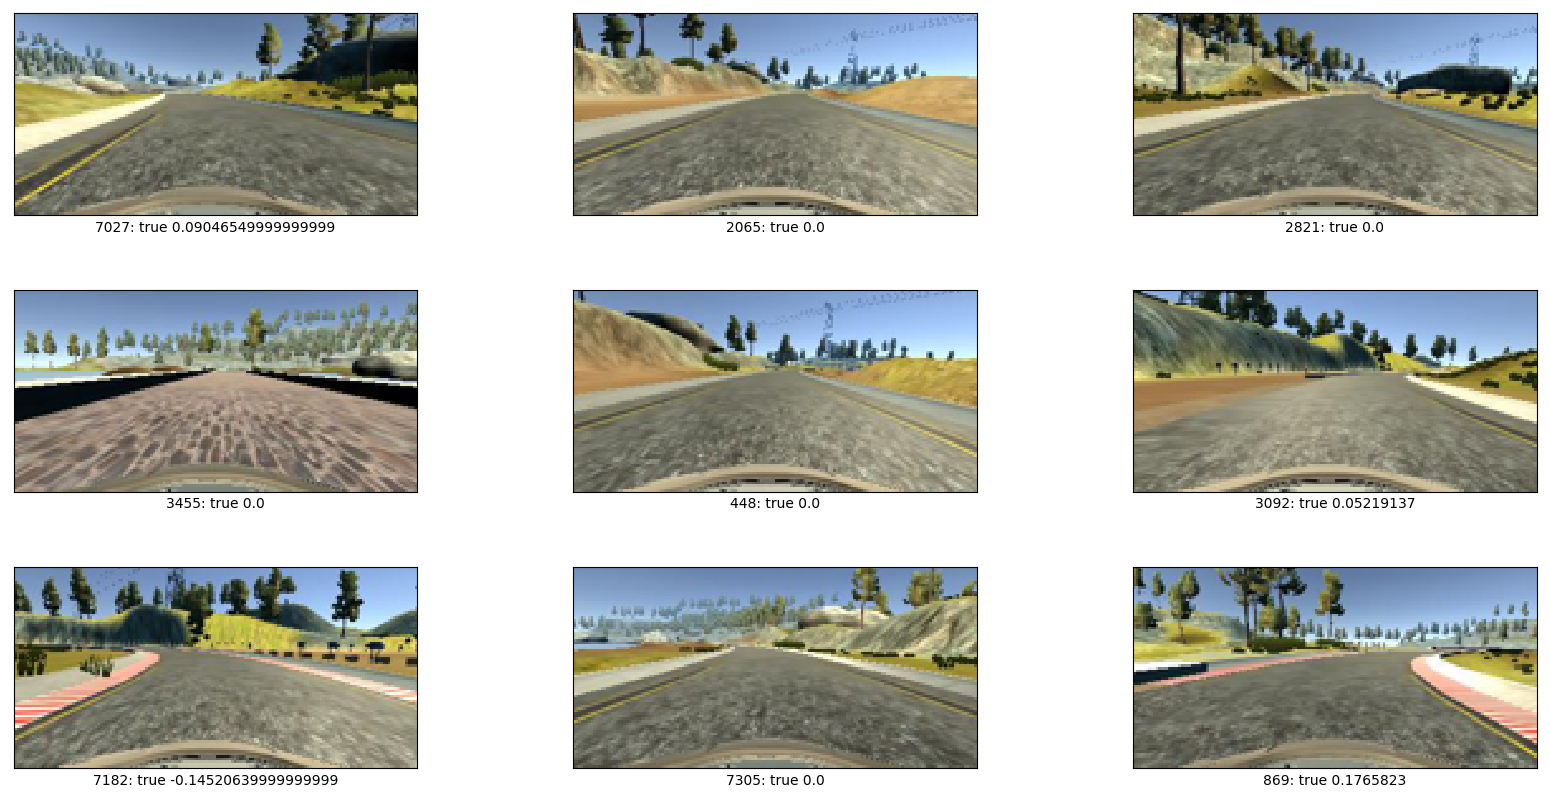

In [13]:
# show 9 random images and their steering angles
show_images(cimages, steering, 3, 3)

## Preprocess Images: Mask Top and Bottom

In [14]:
# define mask as numpy array
shape = (None,) + desired_size + (3,)
mask = np.zeros(shape[1:])
mask[0:27,:,:] = 0
mask[27:65,:,:] = 1
mask[65:,:,:] = 0

In [15]:
# apply mask
cimages = np.multiply(cimages,mask).astype(np.uint8)

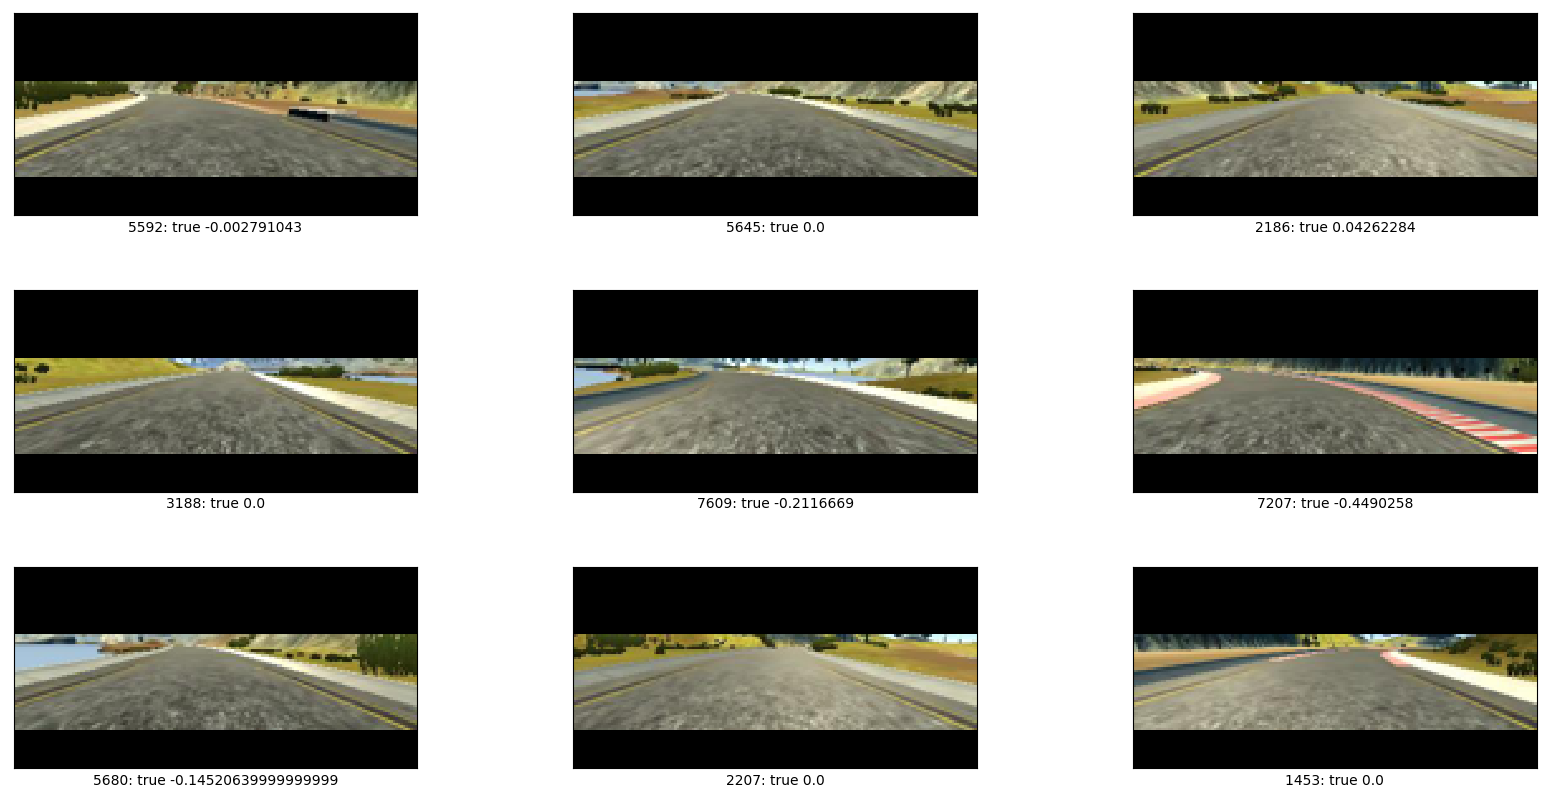

In [16]:
# show 12 random images after preprocessing
show_images(cimages, steering, 3, 3, random=True)

## Random Image Augmentation

In [17]:
import cv2

In [18]:
# random image shifts using OpenCV.
# thanks to Vivek Yadav (https://github.com/vxy10/P3-BehaviorCloning) for inspiration!
def trans_image(image, steer, trans_range):
    tr_x = trans_range*np.random.uniform()-trans_range/2
    steer_ang = steer + tr_x/trans_range*2*.2
    tr_y = 40*np.random.uniform()-40/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    image_tr = cv2.warpAffine(image,Trans_M,(shape[2], shape[1]))
    return image_tr,steer_ang

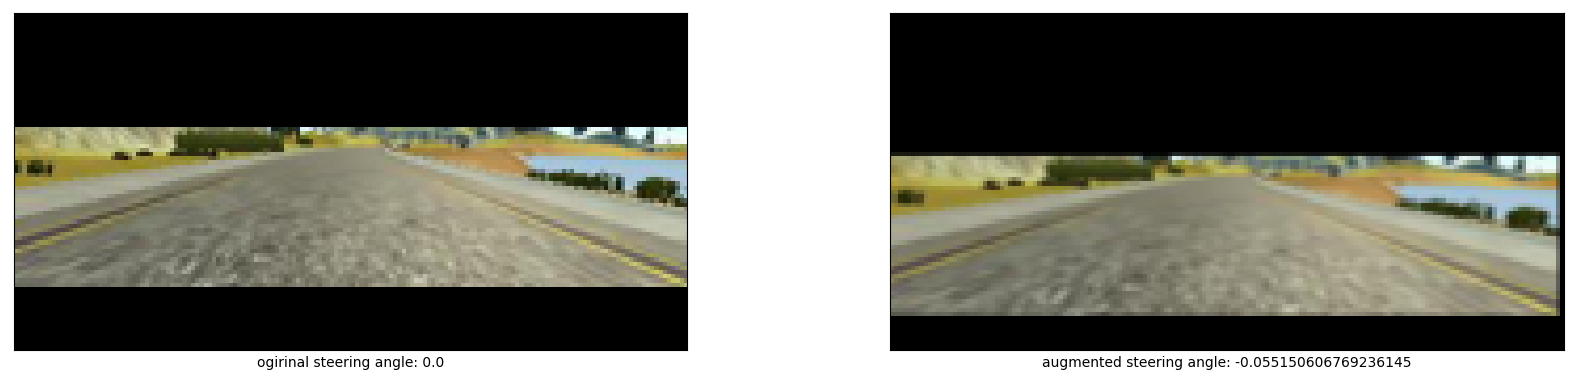

In [19]:
# test image augmentation on a random image
idx = 500
im, st = trans_image(cimages[idx], steer=steering[idx], trans_range=10)

fig, axes = plt.subplots(1, 2)
fig.subplots_adjust(hspace=0.37, wspace=0.3)
axes = axes.flat

axes[0].imshow(cimages[idx]);
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_xlabel('ogirinal steering angle: {}'.format(steering[idx]))

axes[1].imshow(im)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_xlabel('augmented steering angle: {}'.format(st));

## Image Generator For Training

In [20]:
def train_Generator(batch_size=64):
    n = len(cimage_names)
    shape = (batch_size,)+cimages.shape[1:]
    images = np.zeros(shape, dtype=np.uint8)
    image_steering = np.zeros(batch_size)
    # loop indefinitely over entire image data set
    while 1:
        # randomly shuffle the original training data
        perm = np.random.permutation(range(len(cimage_names)))
        # current batch image counter
        current_batch_cnt = 0
        # for each 'original' image add 3 images to the batch
        for i in perm: 
            # 1st: original image and associated steering angle
            images[current_batch_cnt,:,:,:] = cimages[i]
            image_steering[current_batch_cnt] = steering[i]
            current_batch_cnt += 1
            # 2nd: fliped original image **from another part of the set**, with inverse steering angle
            j = perm[n-1-i]
            images[current_batch_cnt,:,:,:] = cimages[j][:,::-1,:]
            image_steering[current_batch_cnt] = -steering[j]
            current_batch_cnt += 1
            # 3rd: original image, randomly shifted. for car to recover from mistakes
            trrange = 20
            im, st = trans_image(cimages[i], steer=steering[i], trans_range=trrange)
            images[current_batch_cnt,:,:,:] = im
            image_steering[current_batch_cnt] = st
            current_batch_cnt += 1

            # if batch is full size or will be over the size after next image, yield the batch
            if current_batch_cnt == batch_size or current_batch_cnt+3>batch_size:
                yield images, image_steering
                current_batch_cnt = 0

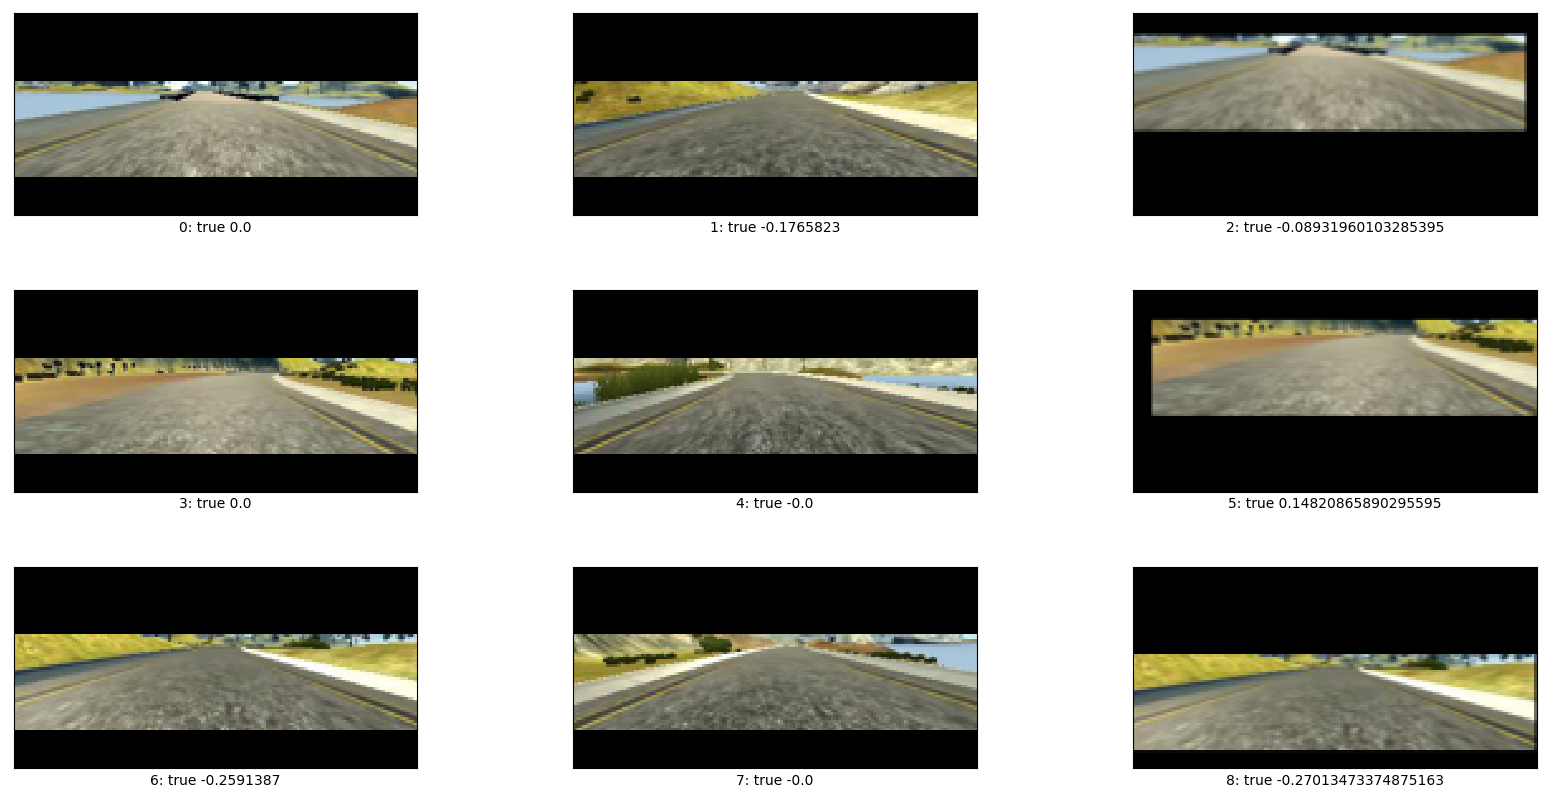

In [21]:
# manually test the generator
images, image_steering = train_Generator(9).__next__()
show_images(images, image_steering, 3, 3, random=False)

In [22]:
st_time2 = datetime.now()
print ('loaded and preprecessed the data in: {} secs'.format((st_time2 - st_time).total_seconds()))

loaded and preprecessed the data in: 34.233684 secs


## Import Tensorflow and Keras

In [23]:
import tensorflow as tf
import keras as K

from keras.models import Sequential, model_from_json
from keras.layers import Input, Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, ELU, Lambda
from keras.optimizers import Adam

Using TensorFlow backend.


In [24]:
# limit GPU memory used by Tensorflow.
# based on: http://forums.fast.ai/t/gpu-garbage-collection/1976/5
def limit_mem():
    K.backend.tensorflow_backend.get_session().close()
    cfg = tf.ConfigProto()
    cfg.gpu_options.allow_growth = True
    K.backend.tensorflow_backend.set_session(tf.Session(config=cfg))

In [25]:
limit_mem()

## Define our Deep Net Architecture

In [26]:
model = Sequential()
inputs_shape = desired_size + (3,)
# normalize input image pixels
model.add(Lambda(lambda x: x/255 - 0.5, input_shape=inputs_shape, output_shape=inputs_shape))
# convolutions
model.add(Conv2D(24, (5, 5), strides=(2,2), padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(36, (5, 5), strides=(2,2), padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(48, (5, 5), strides=(2,2), padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='valid'))
model.add((Dropout(0.1)))
model.add(Activation('relu'))
# fully connected layers
model.add(Flatten()) 
model.add(Dense(300, activation='relu'))
model.add(Dense(10))
# output -- single number, steering angle
model.add(Dense(1))
# print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 80, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 78, 24)        1824      
_________________________________________________________________
activation_1 (Activation)    (None, 38, 78, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 37, 36)        21636     
_________________________________________________________________
activation_2 (Activation)    (None, 17, 37, 36)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 17, 48)         43248     
_________________________________________________________________
activation_3 (Activation)    (None, 7, 17, 48)         0         
__________

## Define Training Parameters and Train

In [27]:
learning_rate= 0.0001
batch_size = 256 # 1gb of GPU memory is enough. roughly 68 sec/epoch on Macbook's NVIDIA 750m, ~6 mins. 130sec/ep on CPU, ~11min
epochs = 5
optimizer = Adam(lr=learning_rate)

In [28]:
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [29]:
# main training
history = model.fit_generator(train_Generator(batch_size), 
                              steps_per_epoch=(len(cimage_names)*3)/batch_size, 
                              epochs=epochs,
                              verbose=1)

Epoch 1/5
95/94 [==============================] - 73s - loss: 0.0161 - mean_squared_error: 0.0161    
Epoch 2/5
95/94 [==============================] - 86s - loss: 0.0152 - mean_squared_error: 0.0152    
Epoch 3/5
95/94 [==============================] - 86s - loss: 0.0141 - mean_squared_error: 0.0141    
Epoch 4/5
95/94 [==============================] - 87s - loss: 0.0141 - mean_squared_error: 0.0141    
Epoch 5/5
95/94 [==============================] - 88s - loss: 0.0134 - mean_squared_error: 0.0134    


In [30]:
# save trained model. architecture and weights.
model.save('model.h5')

In [31]:
st_time3 = datetime.now()
print ('trained in: {} secs'.format((st_time3 - st_time2).total_seconds()))

trained in: 425.413706 secs


## Run Prediction on Test Dataset

In [32]:
def test_Generator(batch_size=64):
    shape = (batch_size,)+cimages.shape[1:]
    while 1:
        for i in range(len(cimage_names) // batch_size): 
            idx = range((i*batch_size), ((i+1)*batch_size))
            yield cimages[idx], steering[idx]

In [33]:
predicted_angle = model.predict_generator(test_Generator(batch_size), steps=500/batch_size)

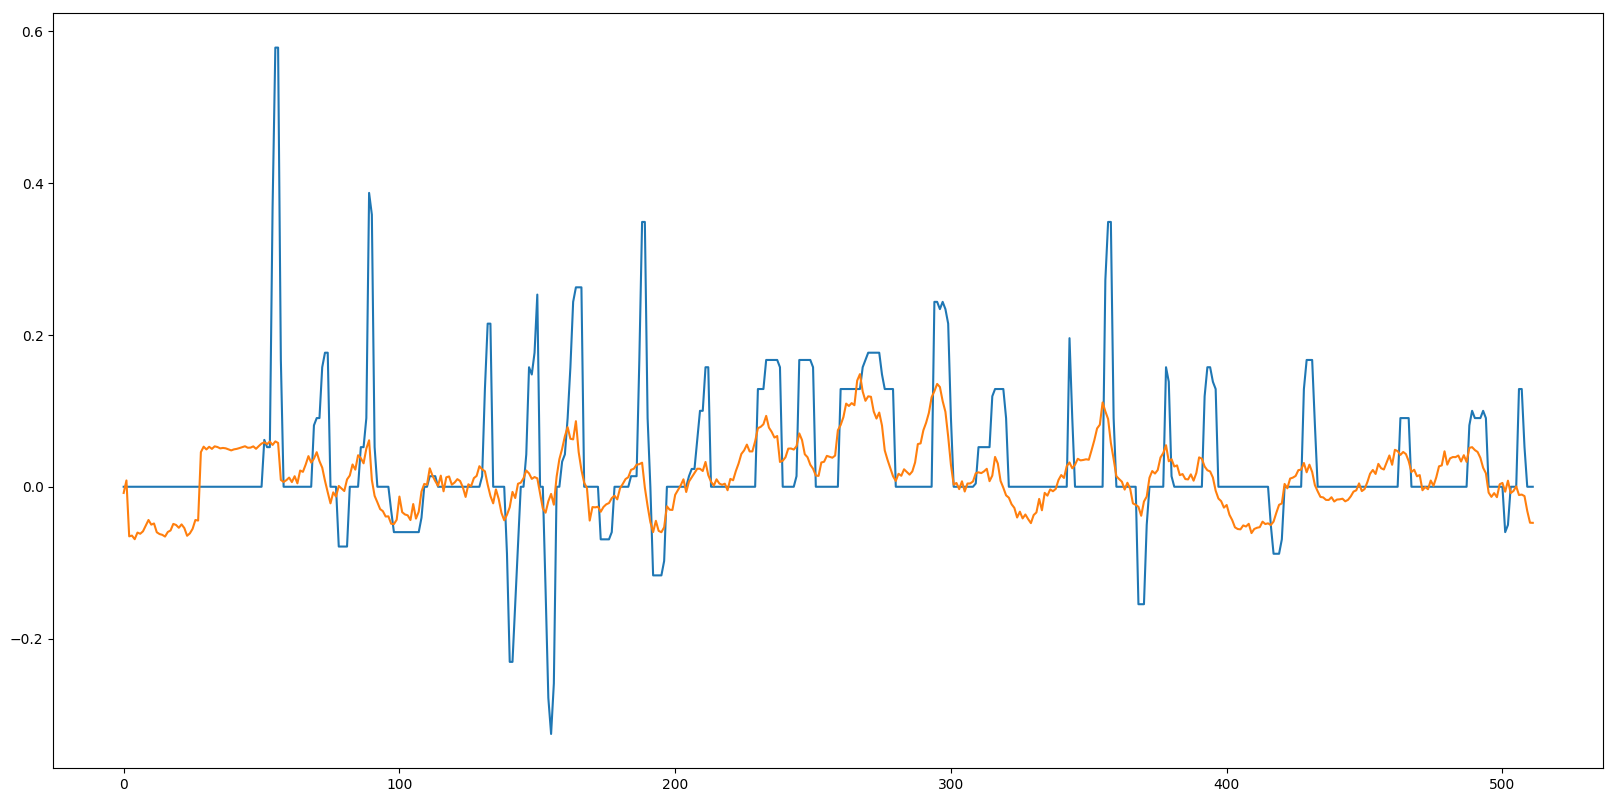

In [34]:
r = range(len(predicted_angle))
plt.plot(r, steering[r], r, predicted_angle[r]);

In [35]:
st_time4 = datetime.now()
print ('predicted in: {} secs'.format((st_time4 - st_time3).total_seconds()))

predicted in: 2.402716 secs


In [36]:
print ('total timing: {} secs'.format((st_time4 - st_time).total_seconds()))

total timing: 462.050106 secs
